1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.
2. Классификация. Найти оптимальное значение параметра регуляризации 
с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.
3. Выбрать порог классификации для LogisticRegression на основе метрики 

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    "Lasso Regression": make_pipeline(StandardScaler(), Lasso(alpha=0.1)),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

In [9]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        "R2": r2,
        "MSE": mse,
        "MAE": mae,
        "Predictions": y_pred
    }
    
    print(f"{name}:")
    print(f"  R2: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print()

Linear Regression:
  R2: 0.4526
  MSE: 2900.1936
  MAE: 42.7941

Ridge Regression:
  R2: 0.4541
  MSE: 2892.0146
  MAE: 42.8120

Lasso Regression:
  R2: 0.4555
  MSE: 2884.6243
  MAE: 42.8052

Polynomial Regression:
  R2: 0.4156
  MSE: 3096.0283
  MAE: 43.5817



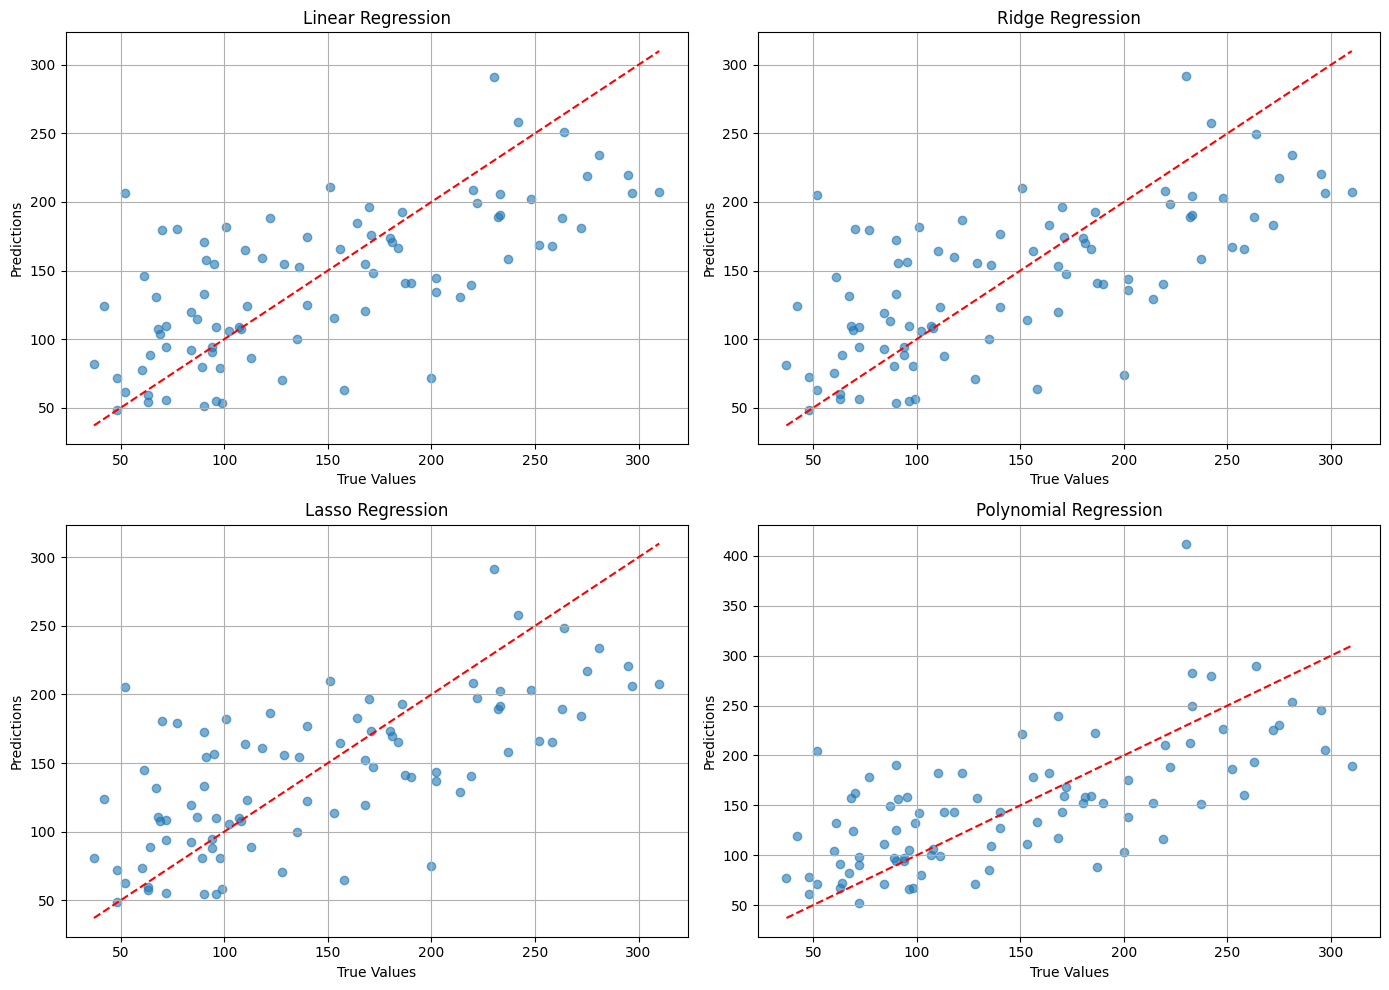

In [10]:
plt.figure(figsize=(14, 10))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, result["Predictions"], alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(name)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.grid(True)

plt.tight_layout()
plt.show()

Среди всех моделей линейная регрессия показывает минимальные значения средней абсолютной ошибки (в процентах). По показателю среднеквадратичной ошибки она также оказывается наиболее точной. Кроме того, по коэффициенту детерминации (R2) линейная регрессия демонстрирует наивысшие результаты.

2. Классификация. Найти оптимальное значение параметра регуляризации 
с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

In [12]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
log_reg_cv = LogisticRegressionCV(
    Cs=np.logspace(-4, 4, 20),  
    cv=5,                       
    scoring='roc_auc',          
    max_iter=1000,              
    random_state=42
)
log_reg_cv.fit(X_train, y_train)

c:\Users\solru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\solru\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=5, max_iter=1000, random_state=42, scoring='roc_auc')

In [14]:
best_C = log_reg_cv.C_[0]
print(f"Оптимальное значение параметра C: {best_C:.4f}")

y_pred_proba = log_reg_cv.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

C_values = log_reg_cv.Cs_
mean_scores = np.mean(log_reg_cv.scores_[1], axis=0)

Оптимальное значение параметра C: 1438.4499
ROC-AUC: 0.9966


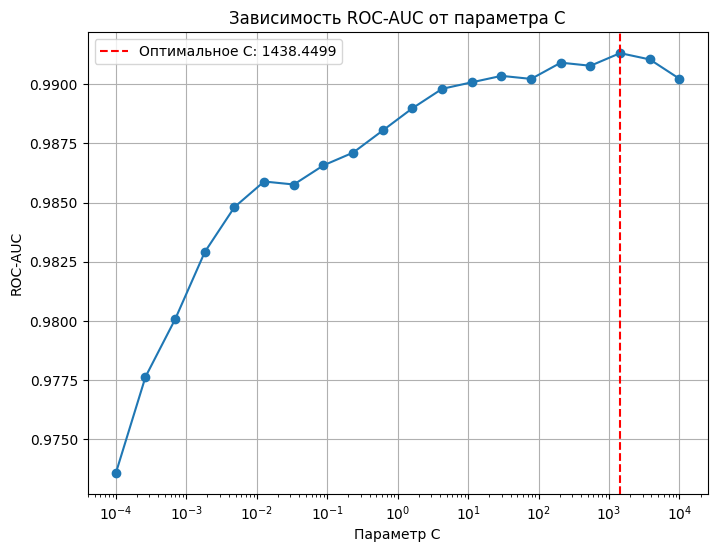

In [15]:
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, mean_scores, marker='o')
plt.axvline(best_C, color='red', linestyle='--', label=f'Оптимальное C: {best_C:.4f}')
plt.xlabel('Параметр C')
plt.ylabel('ROC-AUC')
plt.title('Зависимость ROC-AUC от параметра C')
plt.legend()
plt.grid(True)
plt.show()

Вывод: было выполнено определение наилучшего значения параметра регуляризации С с использованием LogisticRegressionCV. Также была построена графическая зависимость метрики ROC-AUC от различных значений параметра С.

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [22]:
y_pred_proba = log_reg_cv.predict_proba(X_test)[:, 1]

In [23]:
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = np.max(f1_scores)
print(f"Оптимальный порог классификации: {best_threshold:.4f}")
print(f"Максимальный F1-score: {max_f1_score:.4f}")


Оптимальный порог классификации: 0.2323
Максимальный F1-score: 0.9860


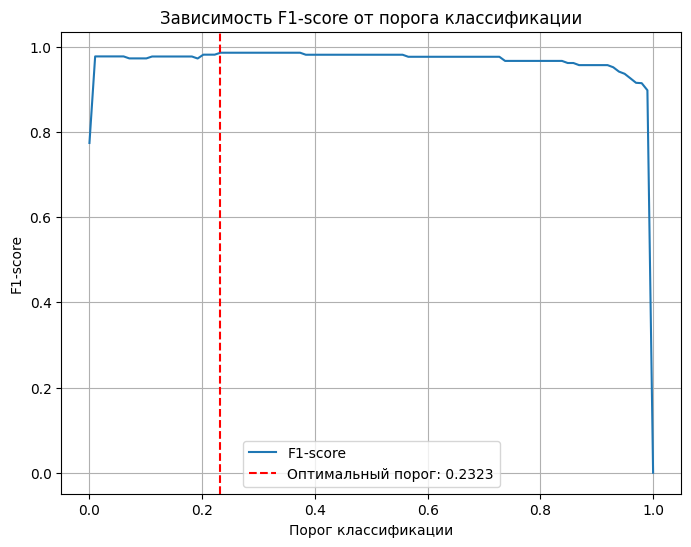

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Оптимальный порог: {best_threshold:.4f}')
plt.xlabel('Порог классификации')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от порога классификации')
plt.legend()
plt.grid(True)
plt.show()

Индекс оптимального порога выходит за пределы массива.


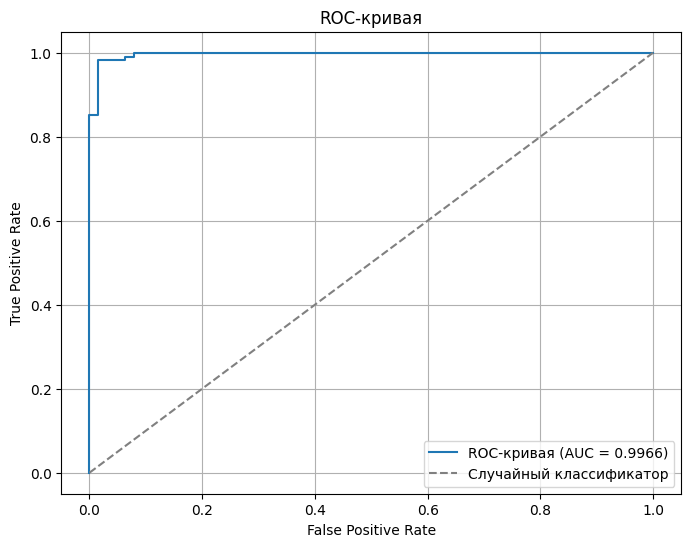

In [32]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайный классификатор')

optimal_idx = np.argmin(np.abs(thresholds - best_threshold))

if optimal_idx < len(fpr):
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Оптимальный порог: {best_threshold:.4f}')
else:
    print("Индекс оптимального порога выходит за пределы массива.")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()

Вывод: используя найденное ранее оптимальное значение параметра регуляризации С, мы применили метрику F1 для выбора наилучшего порога классификации.